# [3920] Homework 4 - Random Forest
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/lung_cancer.csv

## Homework Submission Rules (for all homework assignments)
* Homework is due by 2:30 PM on the due date
  * No late submission will be accepted
* You must submit a cleanly executed notebook (*.ipynb)
  * Verify that you are submitting the correct homework file
* Homework file naming convention
  * LastName_FirstName_HwX.ipynb  [Replace X with the homework #]
    * 1 point deducted for submitting homework not complying with naming convention
* Before submission, execute "Kernel -> Restart Kernel and Run All Cells"
  * 1 point deducted for not submitting a cleanly executed notebook

## Homework 4 Requirements
* Part 1:
  * Load and examine data
  * Clean and prepare data for model training
  * Display the first few rows of the final set of independent variables used for all the model trainings
  * Display RandomForestClassifier model default hyperparameters
  * Train RandomForestClassifier model with default hyperparameters
  * Print model accuracy
  * Display confusion matrix
* Part 2: The objective is to improve performance to exceed that of the model with default hyperparameters
  * If you used hyperparameter random_state in your initial model training, do NOT change this value during model retrainings
  * Do NOT re-split training and test sets during model retrainings
  * Prepare hyperparameter variables for grid search
  * Setup and print grid search hyperparameter variables grid
  * Setup and execute grid search with k-fold cross validation using the hyperparameter variables grid
  * Print best hyperparameters combination from grid search
  * Re-train RandomForestClassifier model with best hyperparameters
  * Print model accuracy from the best grid search model
  * Display confusion matrix from the best grid search model

In [145]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')
SEED = 645

Run time: 06/10/25 22:44:40


### Import libraries

In [146]:
import numpy as np
import pandas as pd
# Add other imports as needed
import seaborn as sns
import sklearn
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

Lung cancer patient data
- GENDER : M=Male, F=Female
- AGE : patient age
- SMOKING : 2=yes, 1=no
- YELLOW_FINGERS : 2=yes, 1=no
- ANXIETY : 2=yes, 1=no
- PEER_PRESSURE : 2=yes, 1=no
- CHRONIC_DISEASE : 2=yes, 1=no
- FATIGUE : 2=yes, 1=no
- ALLERGY : 2=yes, 1=no
- WHEEZING : 2=yes, 1=no
- ALCOHOL_CONSUMING : 2=yes, 1=no
- COUGHING : 2=yes, 1=no
- SHORTNESS_OF_BREATH : 2=yes, 1=no
- SWALLOWING_DIFFICULTY : 2=yes, 1=no
- CHEST_PAIN : 2=yes, 1=no
- LUNG_CANCER : target variable : 2=yes, 1=no

## Part 1

### Load data

In [147]:
df = pd.read_csv("https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/lung_cancer.csv")

### Examine data

In [148]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [149]:
df.dtypes

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


### Prepare data for model training

In [150]:
# Columns to OneHot encode
one_hot_cols = ['GENDER', 'LUNG_CANCER']

In [151]:
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [152]:
# Display the first few rows of the final set of independent variables used for all the model trainings
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_M,LUNG_CANCER_YES
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,True,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,True,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,False,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,True,False
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,False,False


### Separate independent variables and dependent variable
* Independent variables: all remaining variables except 'LUNG_CANCER'
* Dependent variable: 'LUNG_CANCER'

In [153]:
x = df.drop("LUNG_CANCER_YES",axis=1)
y = df["LUNG_CANCER_YES"]

### Split into training and test sets

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

### Instantiate the RandomForestClassifier model with default hyperparameters

In [155]:
rf = RandomForestClassifier(random_state=SEED)

### Print RandomForestClassifier default hyperparameters

In [156]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 645,
 'verbose': 0,
 'warm_start': False}

### Train RandomForestClassifier model using the default hyperparameters


In [157]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=645)

### Evaluate performance for RandomForestClassifier (with default hyperparameters)

In [158]:
# Print baseline accuracy score
y_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"RandFor Accuracy is : {round(rf_accuracy*100,2)}%")

RandFor Accuracy is : 91.94%


<Axes: xlabel='Predicted', ylabel='Actual'>

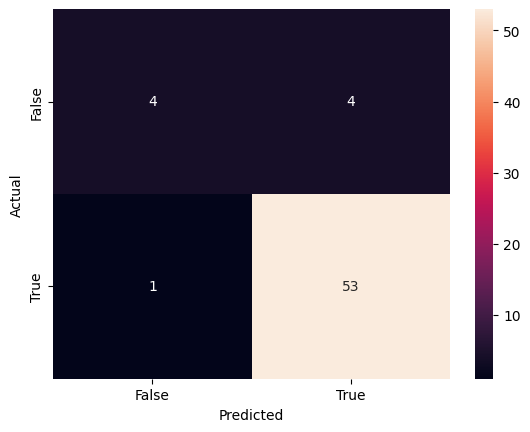

In [159]:
# Display confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')

## Part 2

### NOTE: The objective of the hyperparameter search is to improve model performance above the default hyperparameters

### Prepare variables for hyperparameter search
* Choose at least 3 random forest classifier hyperparameters for grid search
* For each hyperparameter selected, set up an array of values
  * For example: max_features = ['log2', 'sqrt']

In [160]:
n_estimators = [20, 50, 80, 100]
max_depth = [None, 5, 10, 15, 30]
max_features = ['log2', 'sqrt', 'auto']
max_samples = [100,150,200,250]

### Create the hyperparameter grid for the grid search
Use the variables prepared above

In [161]:
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features,
    'max_samples': max_samples
}

### Print the hyperparameter grid for the grid search

In [162]:
param_grid

{'n_estimators': [20, 50, 80, 100],
 'max_depth': [None, 5, 10, 15, 30],
 'max_features': ['log2', 'sqrt', 'auto'],
 'max_samples': [100, 150, 200, 250]}

### Set up grid search with k-fold cross validation using the hyperparameter grid

In [163]:
# Set up k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold, scoring='accuracy')

### Perform grid search
Be patient, this might take a minute or longer

In [164]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
800 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 437, in fit
    n_samples_bootstrap = _get

GridSearchCV(cv=KFold(n_splits=5, random_state=645, shuffle=True),
             estimator=RandomForestClassifier(random_state=645),
             param_grid={'max_depth': [None, 5, 10, 15, 30],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'max_samples': [100, 150, 200, 250],
                         'n_estimators': [20, 50, 80, 100]},
             scoring='accuracy')

### Print the best hyperparameters found by the grid search

> Add blockquote



In [165]:
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'max_depth': None, 'max_features': 'log2', 'max_samples': 100, 'n_estimators': 80}


### Evaluate performance for updated RandomForestClassifier (with best hyperparameters)

In [166]:
# Use best model to make predictions on the test set
grid_best_model = grid_search.best_estimator_
y_pred = grid_best_model.predict(x_test)

In [167]:
# Print best model accuracy score
y_pred = grid_best_model.predict(x_test)
best_model_accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy is : {round(best_model_accuracy*100,2)}%")

Best Model Accuracy is : 93.55%


<Axes: xlabel='Predicted', ylabel='Actual'>

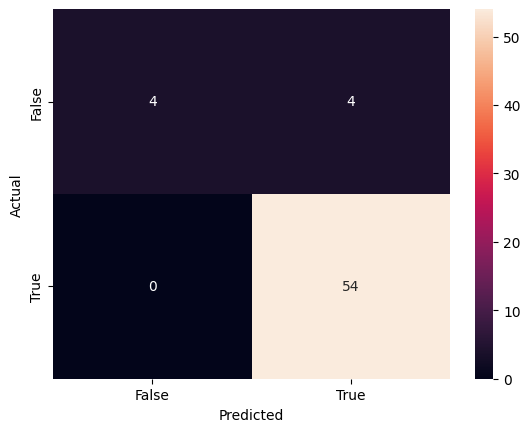

In [168]:
# Display best model confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')